Aircraft Analysis
=========================

Sample analysis file for glider with rg15 airfoil

Results can be compared to xflr5 analysis done in https://www.rcsoaringdigest.com/pdfs/RCSD-2008/RCSD-2008-02.pdf


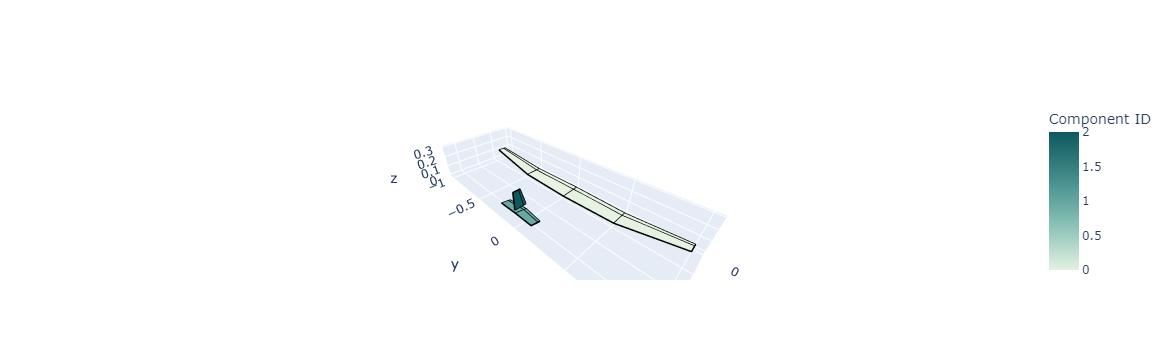

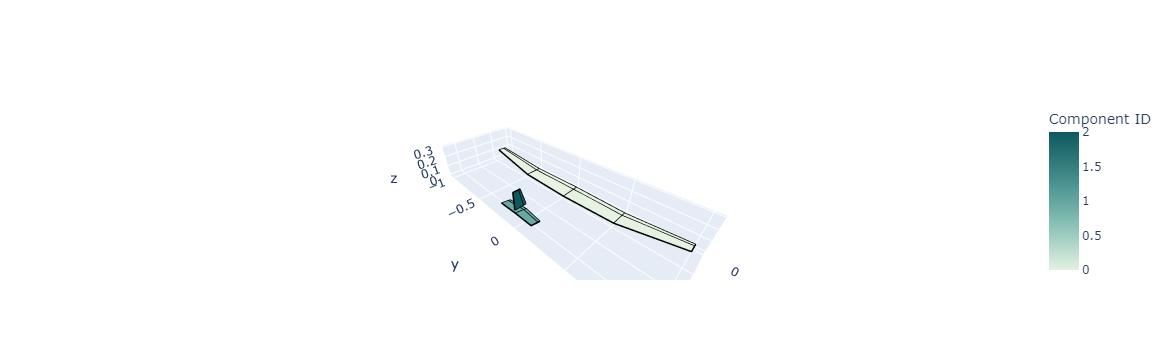

In [2]:
from aerosandbox import *
import plotly.io as pio
pio.renderers.default = "jupyterlab"

rg15 = Airfoil(name="rg15").repanel(50)

glider = Airplane(
    name="Peter's Glider",
    xyz_ref=[0, 0, 0],  # CG location
    wings=[
        Wing(
            name="Main Wing",
            xyz_le=[0, 0, 0],  # Coordinates of the wing's leading edge
            symmetric=True,  # Should we mirror the wing across the XZ plane?
            xsecs=[  # The wing's cross ("X") sections
                WingXSec(  # Root cross ("X") section
                    xyz_le=[0, 0, 0],  # Coordinates of the XSec's leading edge, relative to the wing's leading edge.
                    chord=0.18,
                    twist_angle=2,  # degrees
                    airfoil=rg15,
                    control_surface_is_symmetric=True,
                    # Flap # Control surfaces are applied between a given XSec and the next one.
                    control_surface_deflection=0,  # degrees
                    control_surface_hinge_point=0.75  # as chord fraction
                ),
                WingXSec(  # Mid
                    xyz_le=[0.01, 0.5, 0],
                    chord=0.16,
                    twist_angle=0,
                    airfoil=rg15,
                    control_surface_is_symmetric=False,  # Aileron
                    control_surface_deflection=0,
                    control_surface_hinge_point=0.75
                ),
                WingXSec(  # Tip
                    xyz_le=[0.08, 1, 0.1],
                    chord=0.08,
                    twist_angle=-2,
                    airfoil=rg15,
                )
            ]
        ),
        Wing(
            name="Horizontal Stabilizer",
            xyz_le=[0.6, 0, 0.1],
            symmetric=True,
            xsecs=[
                WingXSec(  # root
                    xyz_le=[0, 0, 0],
                    chord=0.1,
                    twist_angle=-10,
                    airfoil=Airfoil(name="naca0012"),
                    control_surface_is_symmetric=True,  # Elevator
                    control_surface_deflection=0,
                    control_surface_hinge_point=0.75
                ),
                WingXSec(  # tip
                    xyz_le=[0.02, 0.17, 0],
                    chord=0.08,
                    twist_angle=-10,
                    airfoil=Airfoil(name="naca0012")
                )
            ]
        ),
        Wing(
            name="Vertical Stabilizer",
            xyz_le=[0.6, 0, 0.15],
            symmetric=False,
            xsecs=[
                WingXSec(
                    xyz_le=[0, 0, 0],
                    chord=0.1,
                    twist_angle=0,
                    airfoil=Airfoil(name="naca0012"),
                    control_surface_is_symmetric='symmetric',  # Rudder
                    control_surface_deflection=0,
                    control_surface_hinge_point=0.75
                ),
                WingXSec(
                    xyz_le=[0.04, 0, 0.15],
                    chord=0.06,
                    twist_angle=0,
                    airfoil=Airfoil(name="naca0012")
                )
            ]
        )
    ]
)

glider.draw() 

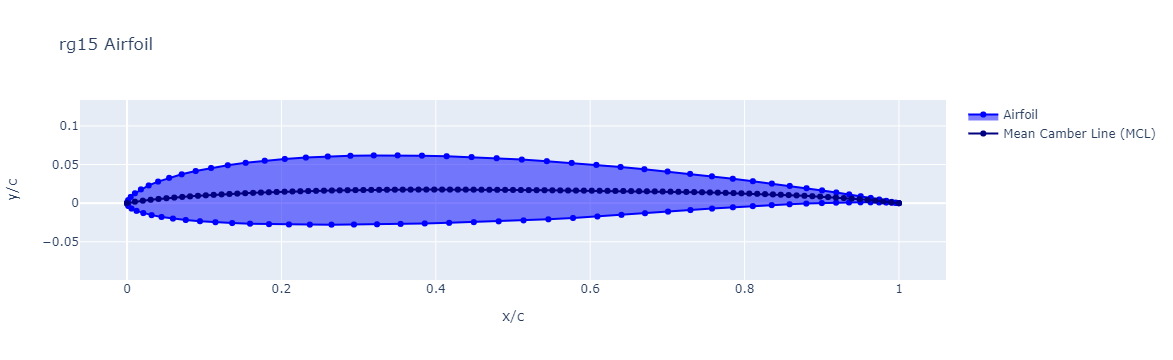

In [5]:
airfoil=rg15
airfoil.draw()

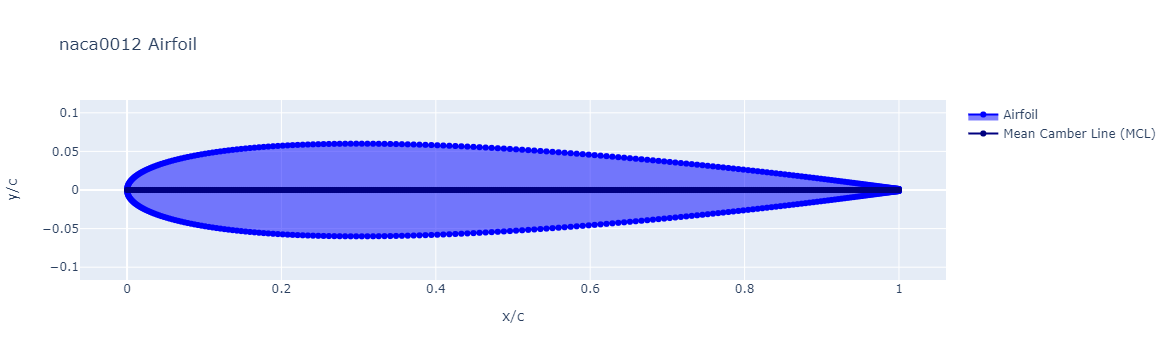

In [4]:
airfoil = Airfoil(name="naca0012")
airfoil.draw()

Polars for RG15 Airfoil
=======================

Calculate the polars for rg15 to compare to xflr5.  There is example calculations for rg15 already done in tutorial at https://www.rcsoaringdigest.com/pdfs/RCSD-2008/RCSD-2008-02.pdf

In [6]:
reynolds = [10000,20000,30000,50000,100000,150000,200000,300000,500000]
polars = {}
for re in reynolds:
    xf = XFoil(
        airfoil=rg15,
        Re=re,
        max_iter=40
    )
    polars[re] = xf.alpha(np.arange(-3, 9, .25))

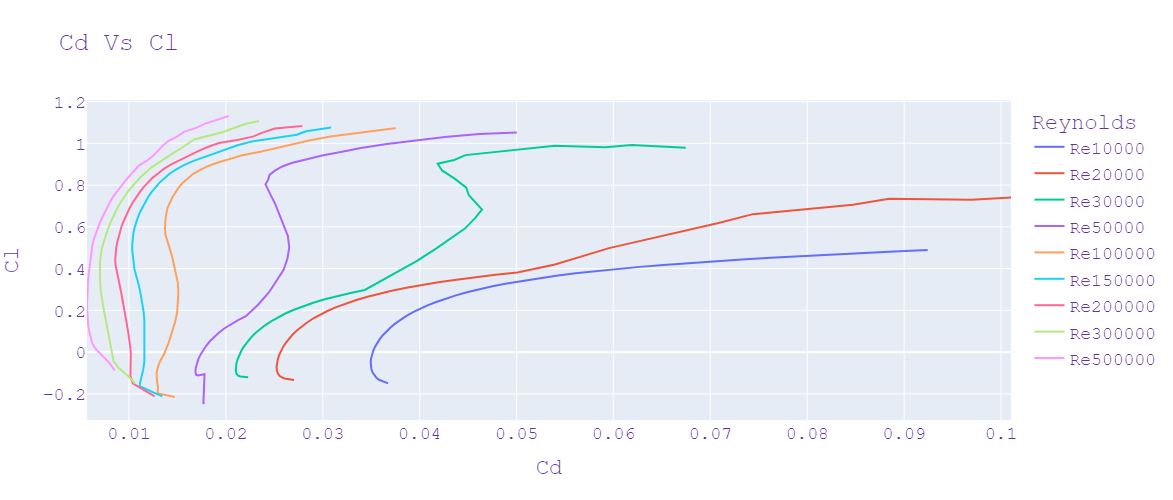

In [7]:
import plotly.graph_objects as go
fig = go.Figure()

for re in reynolds:
    polar = polars[re]
    fig.add_trace(go.Scatter(
        x=polar['CD'],
        y=polar['CL'],
        name="Re" + str(re)      # this sets its legend entry
    ))

    fig.update_layout(
        title="Cd Vs Cl",
        width=700, 
        height=500,
        xaxis_title="Cd",
        yaxis_title="Cl",
        legend_title="Reynolds",
        font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple"
        )
    )

fig.show()

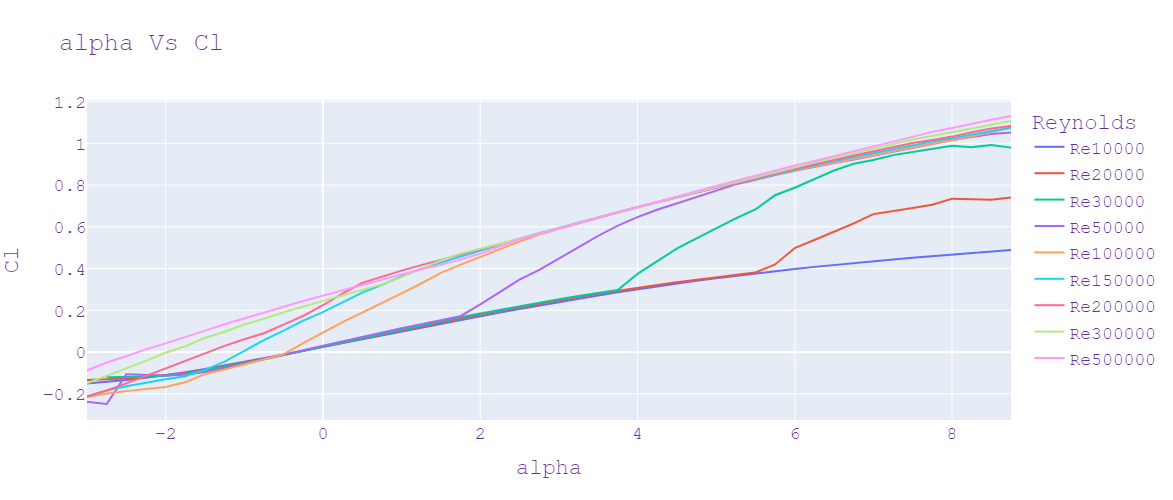

In [8]:
import plotly.graph_objects as go
fig = go.Figure()

for re in reynolds:
    polar = polars[re]
    fig.add_trace(go.Scatter(
        x=polar['alpha'],
        y=polar['CL'],
        name="Re" + str(re)      # this sets its legend entry
    ))

    fig.update_layout(
        title="alpha Vs Cl",
        width=700, 
        height=500,
        xaxis_title="alpha",
        yaxis_title="Cl",
        legend_title="Reynolds",
        font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple"
        )
    )

fig.show()

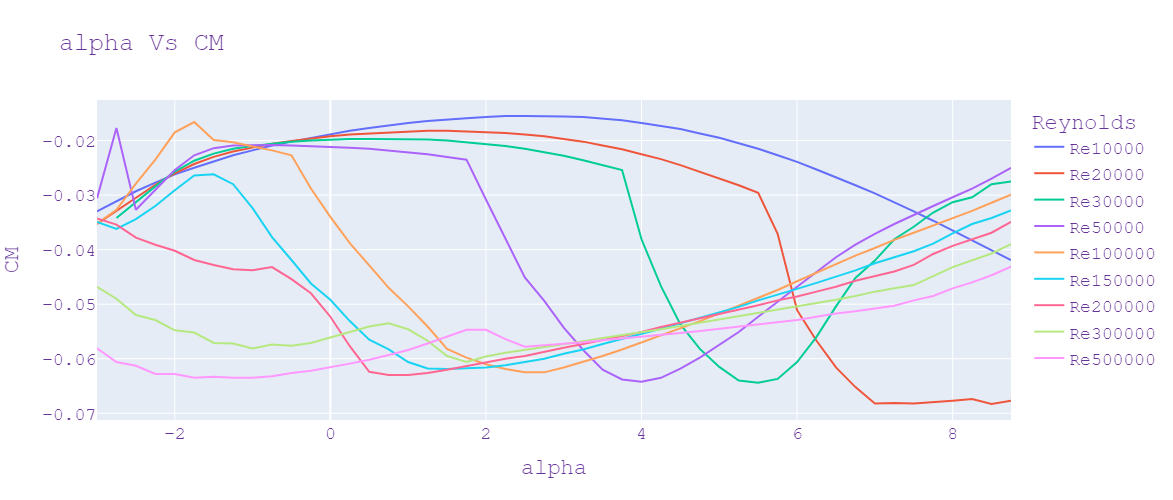

In [9]:
import plotly.graph_objects as go
fig = go.Figure()

for re in reynolds:
    polar = polars[re]
    fig.add_trace(go.Scatter(
        x=polar['alpha'],
        y=polar['CM'],
        name="Re" + str(re)      # this sets its legend entry
    ))

    fig.update_layout(
        title="alpha Vs CM",
        width=700, 
        height=500,
        xaxis_title="alpha",
        yaxis_title="CM",
        legend_title="Reynolds",
        font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple"
        )
    )

fig.show()

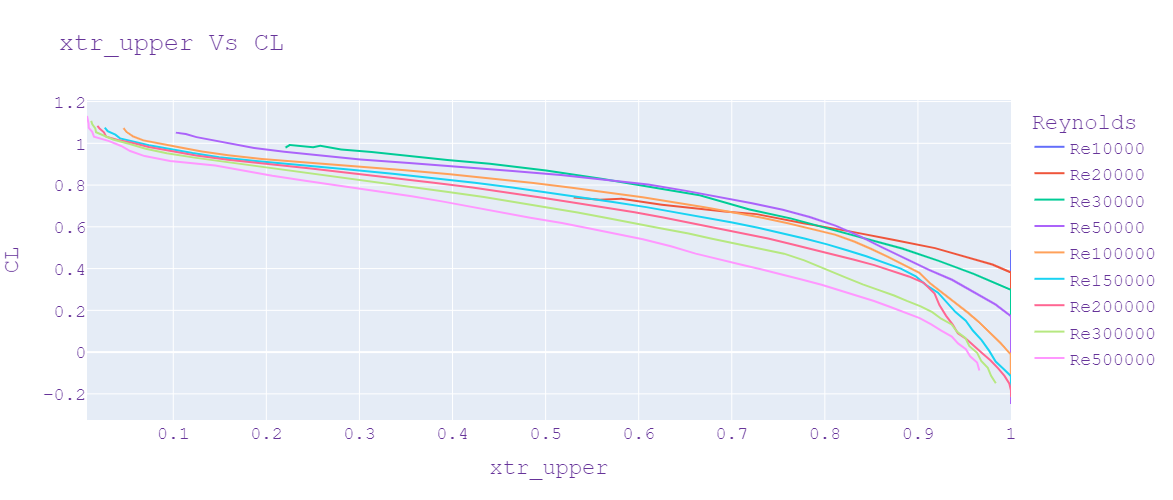

In [10]:
import plotly.graph_objects as go
fig = go.Figure()

for re in reynolds:
    polar = polars[re]
    fig.add_trace(go.Scatter(
        x=polar['xtr_upper'],
        y=polar['CL'],
        name="Re" + str(re)      # this sets its legend entry
    ))

    fig.update_layout(
        title="xtr_upper Vs CL",
        width=700, 
        height=500,
        xaxis_title="xtr_upper",
        yaxis_title="CL",
        legend_title="Reynolds",
        font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple"
        )
    )

fig.show()


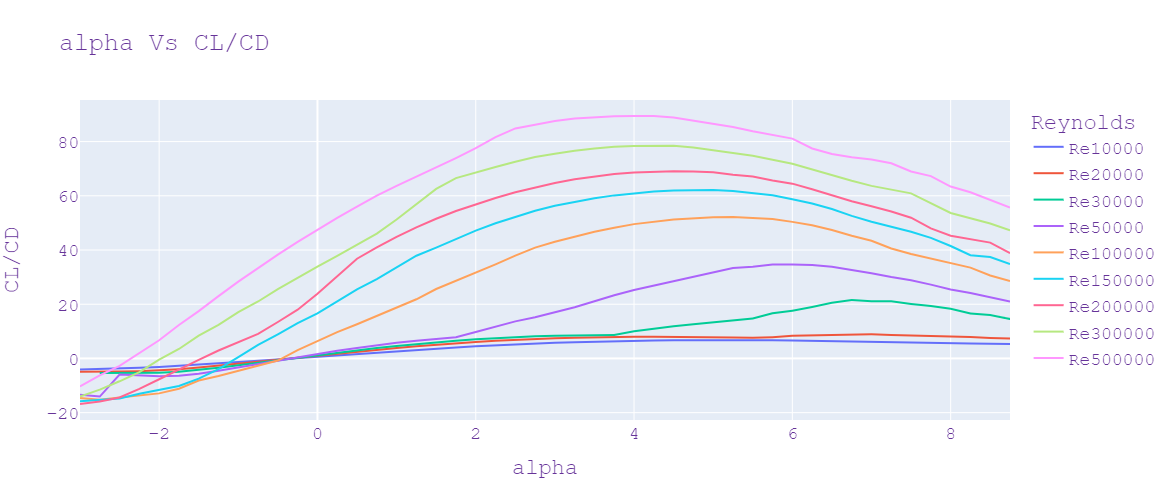

In [11]:
import plotly.graph_objects as go
fig = go.Figure()

for re in reynolds:
    polar = polars[re]
    fig.add_trace(go.Scatter(
        x=polar['alpha'],
        y=polar['CL']/polar['CD'],
        name="Re" + str(re)      # this sets its legend entry
    ))

    fig.update_layout(
        title="alpha Vs CL/CD",
        width=700, 
        height=500,
        xaxis_title="alpha",
        yaxis_title="CL/CD",
        legend_title="Reynolds",
        font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple"
        )
    )

fig.show()